In [1]:
import pandas
from columns import *

data = pandas.read_csv("Obligatorisches Fach Informatik anonymized.csv")
data = data.iloc[:,3:] # drop first three columns

# merge duplicate columns
for col in VERB_ITEMS | MATHE_ITEMS:
    data[col] = data[col].fillna(data[col + ".1"])
    del data[col + ".1"]

data

,"Ich habe/hatte bereits ein Fach ""Informatik"" oder ""Medien und Informatik"" an der Schule.",Ich habe ein gutes Leseverständnis.,Ich habe mich nie besonders fürs Fach Informatik begeistert.,Ich bin gut in Mathematik.,Im Fach Informatik haben mich meine Klassenkameraden immer um Hilfe gebeten.,"Ich bin schlecht bei Aufgaben, die sprachliche Fähigkeiten erfordern.",Ich war in Mathematik immer gut.,"Ich bin bei Aufgaben, die Informatik-Denken erfordern, nie gut.",Ich kann mich sprachlich gut ausdrücken.,Ich war bisher gut im Fach Informatik.,...,"Wenn es um MB/s, Gigabyte und Megapixel geht, blicke ich nie durch.",Am Computer zu spielen oder zu arbeiten macht mir richtig Spass.,Tippfehler oder sonstige Ungenauigkeiten in Texten oder Grafiken fallen mir sofort auf.,"Ich fände es spannend, eine neue Sprache mit eigener Grammatik zu erfinden.",Man kann mich schon als Computer-Profi bezeichnen.,Alter,Geschlecht,Muttersprache,Aktuelle Schule / Schulniveau,Aktuelles Schuljahr
0,Ja,3.0,4.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,4.0,3.0,4.0,1.0,1.0,16.0,weiblich,Deutsch,Gymnasium,FMS/Gymnasium 1. Klasse
1,Ja,4.0,2.0,3.0,1.0,2.0,3.0,2.0,3.0,4.0,...,1.0,3.0,3.0,2.0,3.0,15.0,männlich,Deutsch,Gymnasium,FMS/Gymnasium 1. Klasse
2,Ja,3.0,3.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,...,3.0,4.0,2.0,3.0,2.0,16.0,männlich,andere,Gymnasium,FMS/Gymnasium 1. Klasse
3,Nein,3.0,NaN,1.0,NaN,1.0,1.0,NaN,3.0,NaN,...,4.0,1.0,1.0,1.0,1.0,16.0,weiblich,Deutsch,Gymnasium,FMS/Gymnasium 1. Klasse
4,Nein,3.0,NaN,3.0,NaN,1.0,3.0,NaN,3.0,NaN,...,1.0,4.0,2.0,2.0,3.0,16.0,männlich,Deutsch,Gymnasium,FMS/Gymnasium 1. Klasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ja,3.0,3.0,3.0,1.0,2.0,3.0,2.0,3.0,3.0,...,2.0,2.0,3.0,3.0,3.0,17.0,weiblich,Deutsch,FMS,FMS/Gymnasium 2. Klasse
61,Ja,4.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,4.0,...,1.0,4.0,3.0,4.0,4.0,17.0,männlich,andere,Gymnasium,FMS/Gymnasium 1. Klasse
62,Nein,3.0,NaN,3.0,NaN,3.0,2.0,NaN,2.0,NaN,...,2.0,4.0,4.0,2.0,3.0,17.0,männlich,Englisch,Gymnasium,FMS/Gymnasium 1. Klasse
63,Nein,3.0,NaN,3.0,NaN,2.0,3.0,NaN,3.0,NaN,...,4.0,1.0,2.0,4.0,1.0,17.0,weiblich,Deutsch,Gymnasium,FMS/Gymnasium 1. Klasse


In [2]:
data[HATTE_INF].value_counts()

Nein    38
Ja      27
Name: Ich habe/hatte bereits ein Fach "Informatik" oder "Medien und Informatik" an der Schule., dtype: int64

In [3]:
data[GESCHLECHT].value_counts()

weiblich    34
männlich    24
anderes      2
Name: Geschlecht, dtype: int64

In [4]:
data[SCHULE].value_counts()

Gymnasium                                              52
FMS                                                     9
Sekundarstufe Niveau P                                  3
Ich wäre am Gymnasium, mache aber ein Austauschjahr     1
Name: Aktuelle Schule / Schulniveau, dtype: int64

In [5]:
data[JAHR].value_counts()

FMS/Gymnasium 1. Klasse    54
FMS/Gymnasium 2. Klasse     8
Sekundarstufe 1. Klasse     1
FMS/Gymnasium 4. Klasse     1
Sekundarstufe 3. Klasse     1
Name: Aktuelles Schuljahr, dtype: int64

In [6]:
data[ALTER].value_counts()

16.0    35
17.0    16
18.0     6
15.0     5
Name: Alter, dtype: int64

array([[<AxesSubplot:title={'center':'verbal'}>,
        <AxesSubplot:title={'center':'mathe'}>],
       [<AxesSubplot:title={'center':'comp'}>,
        <AxesSubplot:title={'center':'inf'}>],
       [<AxesSubplot:title={'center':'inf_hypo'}>, <AxesSubplot:>]],
      dtype=object)

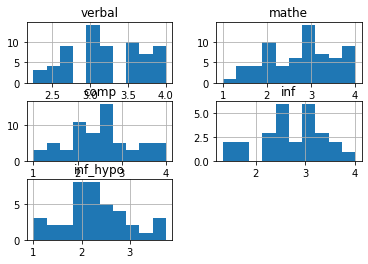

In [7]:
self_concepts = {
    "verbal": VERB_ITEMS,
    "mathe": MATHE_ITEMS,
    "comp": COMP_ITEMS,
    "inf": INF_ITEMS_REAL,
    "inf_hypo": INF_ITEMS_HYPO
}

for concept, items in self_concepts.items():
    neg_items = len([i for i in items.values() if i < 0])
    sums = (data[items] * items.values()).sum(axis=1, min_count=1)
    data[concept] = (sums + neg_items * 5) / len(items)

data[self_concepts].hist()

In [8]:
for concept in self_concepts:
    display(data[concept].value_counts())

3.00    14
3.50    10
2.75     9
4.00     9
3.25     9
3.75     7
2.50     4
2.25     3
Name: verbal, dtype: int64

3.000000    14
2.000000    10
4.000000     9
3.333333     7
3.666667     6
2.666667     6
1.666667     4
2.333333     4
1.333333     4
1.000000     1
Name: mathe, dtype: int64

2.00    11
2.50    10
2.25     8
2.75     6
3.00     5
3.50     5
1.50     5
1.75     3
3.25     3
3.75     3
4.00     2
1.00     2
1.25     1
Name: comp, dtype: int64

2.500000    4
3.000000    3
3.333333    3
3.166667    3
2.833333    2
2.666667    2
2.166667    2
3.500000    2
1.333333    2
1.833333    2
2.333333    1
4.000000    1
Name: inf, dtype: int64

2.00    8
2.25    8
2.50    5
2.75    4
3.00    2
1.75    2
3.50    2
1.25    2
1.50    2
3.25    1
1.00    1
3.75    1
Name: inf_hypo, dtype: int64

In [9]:
data[self_concepts].describe()

,verbal,mathe,comp,inf,inf_hypo
count,65.000000,65.000000,64.000000,27.000000,38.000000
mean,3.230769,2.794872,2.484375,2.722222,2.302632
std,0.496684,0.832692,0.729039,0.656981,0.623736
min,2.250000,1.000000,1.000000,1.333333,1.000000
25%,3.000000,2.000000,2.000000,2.416667,2.000000
50%,3.250000,3.000000,2.500000,2.833333,2.250000
75%,3.500000,3.333333,3.000000,3.166667,2.687500
max,4.000000,4.000000,4.000000,4.000000,3.750000


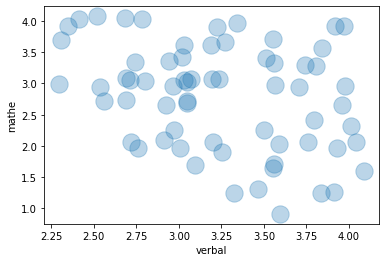

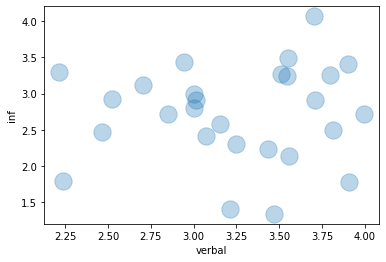

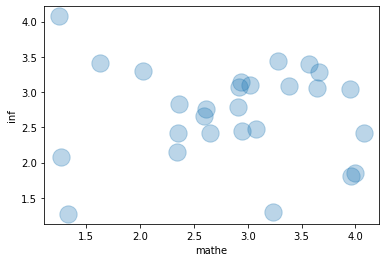

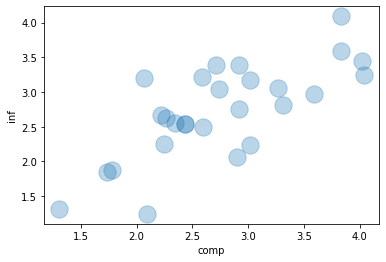

In [10]:
import random

plots = [
    ["verbal", "mathe"],
    ["verbal", "inf"],
    ["mathe", "inf"],
    ["comp", "inf"]
]

for plot in plots:
    randomized = data[plot].applymap(lambda x: x + random.uniform(-0.1, 0.1))
    randomized.plot.scatter(plot[0], plot[1], s=300, alpha=0.3)

In [11]:
import numpy
from util import calculate_corr_pvalues

corr, pvalues = calculate_corr_pvalues(data[self_concepts])
mask = numpy.tril(numpy.ones_like(corr, dtype=bool), -1)
corr.where(mask).replace(numpy.nan, "—")

,verbal,mathe,comp,inf,inf_hypo
verbal,—,—,—,—,—
mathe,-0.29933,—,—,—,—
comp,-0.1536,0.220023,—,—,—
inf,0.028207,-0.065088,0.768164,—,—
inf_hypo,-0.28894,0.573877,0.571758,—,—


In [12]:
pvalues.where(mask).replace(numpy.nan, "—")

,verbal,mathe,comp,inf,inf_hypo
verbal,—,—,—,—,—
mathe,0.015424,—,—,—,—
comp,0.225594,0.080643,—,—,—
inf,0.88893,0.747038,0.000003,—,—
inf_hypo,0.078511,0.000165,0.000218,—,—


In [13]:
from pingouin import cronbach_alpha

alphas = {}
for concept, items in self_concepts.items():
    concept_data = data[items] * items # invert negative items
    alphas[concept] = cronbach_alpha(concept_data)

alphas

{'verbal': (0.7143438701930794, array([0.581, 0.813])),
 'mathe': (0.8198631144808401, array([0.728, 0.884])),
 'comp': (0.8385440970601961, array([0.763, 0.894])),
 'inf': (0.827062706270627, array([0.753, 0.885])),
 'inf_hypo': (0.6853173113030415, array([0.539, 0.794]))}

In [14]:
groups = data[[GESCHLECHT, "inf", "inf_hypo"]].groupby(GESCHLECHT)
groups.describe()

inf                                                              \
           count      mean       std       min  25%  50%       75%       max   
Geschlecht                                                                     
anderes      0.0       NaN       NaN       NaN  NaN  NaN       NaN       NaN   
männlich    17.0  2.911765  0.645814  1.333333  2.5  3.0  3.333333  4.000000   
weiblich    10.0  2.400000  0.567646  1.333333  2.0  2.5  2.666667  3.166667   

           inf_hypo                                                         
              count      mean       std   min     25%    50%     75%   max  
Geschlecht                                                                  
anderes         2.0  1.875000  0.883883  1.25  1.5625  1.875  2.1875  2.50  
männlich        7.0  2.857143  0.690066  2.00  2.2500  3.000  3.3750  3.75  
weiblich       24.0  2.229167  0.447922  1.50  2.0000  2.250  2.5000  3.50

In [15]:
groups.get_group("männlich")

,Geschlecht,inf,inf_hypo
1,männlich,2.833333,NaN
2,männlich,2.166667,NaN
4,männlich,NaN,2.00
9,männlich,NaN,3.50
10,männlich,3.500000,NaN
12,männlich,3.000000,NaN
16,männlich,3.000000,NaN
17,männlich,3.333333,NaN
19,männlich,NaN,3.75
26,männlich,3.333333,NaN


In [16]:
groups.get_group("weiblich")

,Geschlecht,inf,inf_hypo
0,weiblich,1.333333,NaN
3,weiblich,NaN,1.50
5,weiblich,NaN,2.50
6,weiblich,NaN,2.00
7,weiblich,2.500000,NaN
8,weiblich,NaN,2.50
11,weiblich,NaN,2.75
15,weiblich,NaN,3.50
18,weiblich,NaN,2.00
20,weiblich,2.500000,NaN
